In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torch.utils.data as data

In [2]:
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("CUDA device count:", torch.cuda.device_count())
    print("Current device index:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("Running on CPU-only environment. GPU-specific cells will safely skip.")

PyTorch version: 2.8.0+cu126
CUDA available: True
CUDA device count: 1
Current device index: 0
Device name: Tesla T4


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [82]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

print(f"Training set shape: {trainset.data.shape}")
print(f"Testing set shape: {testset.data.shape}")

def preprocess_data(dataset):
    data = (dataset.data / 255.0) - 0.5
    targets = dataset.targets
    return data, targets

x_train, y_train = preprocess_data(trainset)
x_test, y_test = preprocess_data(testset)

x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

x_train_small = x_train[ 0 : 10000 ]
y_train_small = y_train[ 0 : 10000 ]

train_dataset = data.TensorDataset(x_train_small, y_train_small)

batch_size = 64
train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

Training set shape: torch.Size([60000, 28, 28])
Testing set shape: torch.Size([10000, 28, 28])


In [83]:
class MNIST_Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear( in_features = 784, out_features = 1000 )
    self.layer_2 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_3 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_4 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_5 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_6 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_7 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_8 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_9 = nn.Linear( in_features = 1000, out_features = 1000 )
    self.layer_10 = nn.Linear( in_features = 1000, out_features = 10 )

  def forward(self, x):
    input = nn.Flatten()( x )

    hidden_nodes = self.layer_1( input )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_2( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_3( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_4( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_5( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_6( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_7( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_8( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    hidden_nodes = self.layer_9( hidden_nodes )
    hidden_nodes = nn.ReLU()( hidden_nodes )

    logits = self.layer_10( hidden_nodes )

    return logits

In [84]:
model = MNIST_Network().to(device)

In [85]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [86]:
epochs = 200

In [87]:
loss_history = []
test_history = []

Epoch 1, Average Loss: 0.000048, Test Loss: 0.530989
Epoch 2, Average Loss: 0.000048, Test Loss: 0.529181
Epoch 3, Average Loss: 0.000047, Test Loss: 0.533302
Epoch 4, Average Loss: 0.000046, Test Loss: 0.531247
Epoch 5, Average Loss: 0.000046, Test Loss: 0.533214
Epoch 6, Average Loss: 0.000045, Test Loss: 0.534129
Epoch 7, Average Loss: 0.000044, Test Loss: 0.535316
Epoch 8, Average Loss: 0.000043, Test Loss: 0.535745
Epoch 9, Average Loss: 0.000043, Test Loss: 0.535888
Epoch 10, Average Loss: 0.000042, Test Loss: 0.537642
Epoch 11, Average Loss: 0.000042, Test Loss: 0.538239
Epoch 12, Average Loss: 0.000041, Test Loss: 0.539582
Epoch 13, Average Loss: 0.000040, Test Loss: 0.540711
Epoch 14, Average Loss: 0.000039, Test Loss: 0.541982
Epoch 15, Average Loss: 0.000039, Test Loss: 0.541126
Epoch 16, Average Loss: 0.000038, Test Loss: 0.542747
Epoch 17, Average Loss: 0.000038, Test Loss: 0.544137
Epoch 18, Average Loss: 0.000037, Test Loss: 0.545061
Epoch 19, Average Loss: 0.000037, Tes

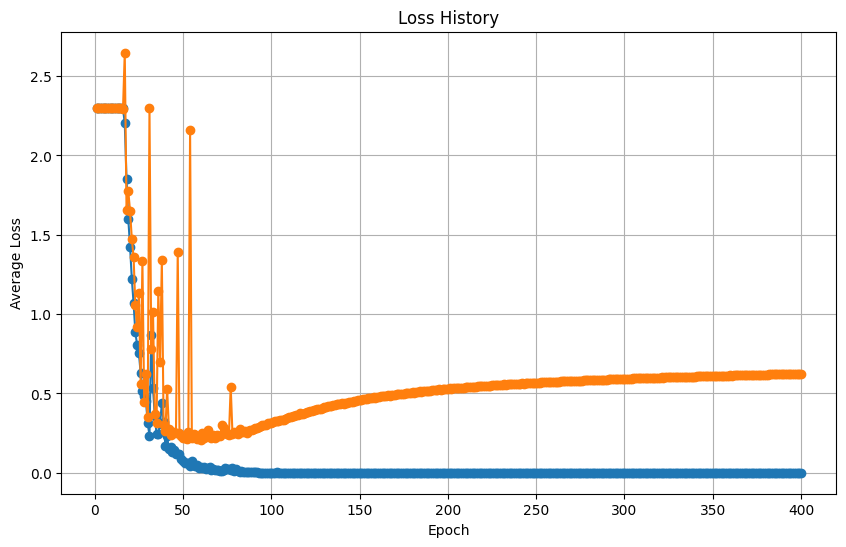

In [89]:
for epoch in range(epochs):
    total_loss = 0

    for x_batch, y_batch in train_loader:
        logits = model(x_batch)
        loss = loss_function(logits, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)

    with torch.no_grad():
      logits = model( x_test )
      test_loss = loss_function(logits, y_test )
      test_history.append( test_loss.item() )

      print(f"Epoch {epoch+1}, Average Loss: {avg_loss:.6f}, Test Loss: {test_loss.item():.6f}")

# Plotting the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-')
plt.plot(range(1, len(test_history) + 1), test_history, marker='o', linestyle='-')
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()

In [91]:
with torch.no_grad():
    predictions = model( x_train_small )
    predicted_classes = torch.argmax(predictions, dim=1)

print( (y_train_small == predicted_classes).float().mean() )

tensor(1., device='cuda:0')


In [90]:
with torch.no_grad():
    predictions = model( x_test )
    predicted_classes = torch.argmax(predictions, dim=1)

print( (y_test == predicted_classes).float().mean() )

tensor(0.9537, device='cuda:0')


In [41]:
batch_size = 4096*2
train_loader = data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)